<div style="background-color : white; border-radius: 15px; width: 93%; padding: 2em; color: black; font-family: Gill Sans, sans-serif;">
<h1 style ="text-align: center; color: black; font-family: Gill Sans, sans-serif;font-weight: 700;"> Test del mio algoritmo su dataset ammissione college</h1>
<h2>Indice</h2>

<ol type="1">
    <li style="padding-top: 0.3em; padding-bottom: 0.3em;"><b>Preparazione dataset</b>
        <ul>
            <li style="padding-top: 0.3em; padding-bottom: 0.3em;">1.1 Pacchetti necessari</li>       
            <li style="padding-bottom: 0.3em;">1.2 Caricamento dataset</li>
            <li style="padding-bottom: 0.3em;">1.3 Divisione del dataset in train e test set</li>
            <li style="padding-bottom: 0.3em;">1.4 Manipolazione dei dati</li>
            <li>1.5 Normalizzazione dei dati</li>
        </ul>
    </li>
    <li style="padding-top: 0.3em; padding-bottom: 0.3em;"><b>Applicazione del modello</b>
        <ul>
            <li style="padding-top: 0.3em; padding-bottom: 0.3em;">2.1 Hyperparameter tuning</li>
            <li style="padding-bottom: 0.3em;">2.2 Allenamento del modello</li>
            <li>2.3 Risultati del modello allenato</li>
        </ul>
    </li>
    <li style="padding-top: 0.3em; padding-bottom: 0.3em;"><b>Valutazione del modello</b>
        <ul>
            <li style="padding-top: 0.3em; padding-bottom: 0.3em;">5.1 Metrica d'errore</li>
            <li style="padding-bottom: 0.3em;">5.2 Confusion Matrix</li>
            <li style="padding-bottom: 0.3em;">5.3 Curva precision e recall</li>
            <li>5.4 Curva ROC e AUC</li>
        </ul>
    </li>
</ol>
</div>

<div style="background-color: white; border-top-left-radius: 15px; border-top-right-radius: 15px; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <a id="#intro" style="text-decoration:none; color: black;"><h3 style="font-weight:700;"> 1. Preparazione del dataset </h3></a>
    <h4 style="color:black"> 1.1 Pacchetti necessari </h4>
</div>

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_recall_curve, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <h4 style="color:black"> 1.2 Caricamento dataset </h4>
</div>

In [13]:
# Carico il dataset
path = './ex2data1.txt'
data = pd.read_csv(path, header=None, names=["Ex1","Ex2","classificazione"])

<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <h4 style="color:black"> 1.3 Divisione del dataset in train e test set </h4>
</div>

In [14]:
# Creo train e test set
X_train, X_test, Y_train, Y_test = train_test_split(data[["Ex1","Ex2"]], data[['classificazione']], test_size=0.23)

<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <h4 style="color: black;"> 1.4 Manipolazione dei dati </h4>
    <ul style="color: black;">
        <li>Tutti i set sono convertiti in array numpy</li>
        <li>Alle features viene aggiunto il bias della funzione d'ipotesi (θ<sub>0</sub>)</li>
        <li>Viene inizializzato il vettore dei pesi</li>
    </ul>
</div>

In [15]:
Y_train = Y_train.to_numpy()
Y_test = Y_test.to_numpy()

m_tr, n_tr = X_train.shape
X_train = np.concatenate((np.ones((m_tr,1)), X_train), axis=1)
n_tr +=1

m_te, n_te = X_test.shape
X_test = np.concatenate((np.ones((m_te,1)), X_test), axis=1)
n_te += 1

W = np.array(np.zeros((1,n_te)))

<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <h4 style="color: black;"> 1.5 Normalizzazione dei dati </h4>
</div>

In [16]:
# Normalizzo i dati
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

<div style="background-color: white; border-bottom-left-radius:15px; border-bottom-right-radius:15px; width:93%; padding:2em 2em 0.2em 2em; font-family:Gill Sans, sans-serif;">
</div>

<div style="background-color: white; border-top-left-radius: 15px; border-top-right-radius: 15px; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <a id="#intro" style="text-decoration:none; color: black;"><h3 style="font-weight:700;"> 2. Applicazione del modello </h3></a>
    <h4 style="color:black"> 2.1 Hyperparameter tuning</h4>
</div>

In [17]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

print(type(KNeighborsClassifier()).__name__)

gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=5, n_jobs = -1)

g_res = gs.fit(X_train, Y_train)
g_res.best_params_


KNeighborsClassifier
Fitting 5 folds for each of 36 candidates, totalling 180 fits


{'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}

<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <h4 style="color: black;"> 2.2 Allenamento modello </h4>
</div>

In [28]:
model_knn = KNeighborsClassifier(n_neighbors = 15, weights = 'distance', metric = 'minkowski')

knn_fit = model_knn.fit(X_train, Y_train)

<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <h4 style="color: black;"> 2.3 Risultati del modello allenato </h4>
</div>

In [29]:
predictions_knn = model_knn.predict(X_test)
predictions_lr_scores = model_knn.predict_proba(X_test)[:,1]

train_score = model_knn.score(X_train, Y_train)
test_score = model_knn.score(X_test, Y_test)
print("### KNN:\n\tAccuracy of training: "+str(train_score)+"\n\tAccuracy of test: "+str(test_score))
print("### KNN:\n\tError rate of training: "+str(1 - train_score)+"\n\tError rate of test: "+str(1 - test_score))

### KNN:
	Accuracy of training: 1.0
	Accuracy of test: 0.9130434782608695
### KNN:
	Error rate of training: 0.0
	Error rate of test: 0.08695652173913049


<div style="background-color: white; border-bottom-left-radius:15px; border-bottom-right-radius:15px; width:93%; padding:2em 2em 0.2em 2em; font-family:Gill Sans, sans-serif;">
</div>

<div style="background-color: white; border-top-left-radius: 15px; border-top-right-radius: 15px; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <a id="#intro" style="text-decoration:none; color: black;"><h3 style="font-weight:700;"> 3. Valutazione del modello </h3></a>
    <h4 style="color:black"> 3.1 Metrica d'errore</h4>
</div>

In [19]:
# metric_error = #valori classe 0 / #valori classi
metric_error = len(data[data.classificazione == 0]) / len(data)
metric_accurancy = 1 - metric_error

print("Error rate di un classificatore che predice solo 0: ", metric_error)
print("Accuracy di un classificatore che predice solo 0: ", metric_accurancy)

Error rate di un classificatore che predice solo 0:  0.4
Accuracy di un classificatore che predice solo 0:  0.6


<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <h4 style="color: black;"> 3.2 Confusion Matrix </h4>
</div>

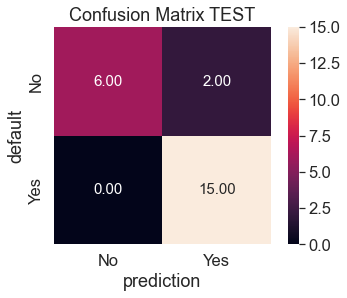

Precision:  0.8823529411764706
Recall:  1.0
Specificity:  0.75


In [24]:
cm = confusion_matrix(Y_test, predictions_knn)
plt.figure()
sns.set(font_scale=1.5)
hm = sns.heatmap( cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=['No', 'Yes'], xticklabels=['No', 'Yes'])
plt.title('Confusion Matrix TEST')
plt.ylabel('default')
plt.xlabel('prediction')
plt.show()

diagonal = np.diag(cm)
antidiagonal = np.fliplr(cm).diagonal()

false_positive = antidiagonal[0]
false_negative = antidiagonal[1]
true_positive = diagonal[1]
true_negative = diagonal[0]

# Precision
pre = true_positive/(true_positive+false_positive)
# Recall
rec = true_positive/(true_positive+false_negative)
# Specificity
sens = true_negative/(true_negative+false_positive) 

print("Precision: ", pre)
print("Recall: ", rec)
print("Specificity: ", sens)

<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <h4 style="color: black;"> 3.3 Curva precision e recall </h4>
</div>

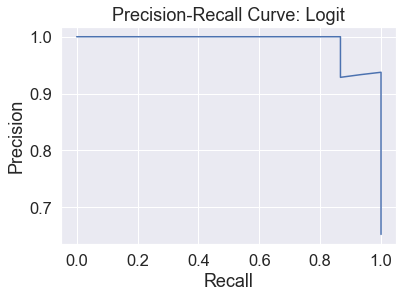

f1-score:  0.9375


In [23]:
precision, recall, thresholds = precision_recall_curve(Y_test, predictions_lr_scores)
plt.figure()
plt.plot(recall, precision)
plt.title("Precision-Recall Curve: Logit")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

print("f1-score: ", f1_score(Y_test, predictions_knn))

<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <h4 style="color: black;"> 3.4 Curva ROC e AUC </h4>
</div>

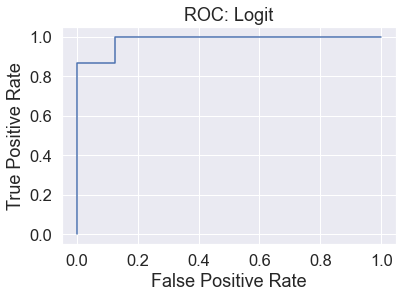

AUC:  0.875


In [26]:
fpr, tpr, thresholds = roc_curve(Y_test, predictions_lr_scores)
plt.figure()
plt.plot(fpr, tpr)
plt.title("ROC: Logit")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

print ("AUC: ", roc_auc_score(Y_test, predictions_knn))

<div style="background-color: white; border-bottom-left-radius:15px; border-bottom-right-radius:15px; width:93%; padding:2em 2em 0.2em 2em; font-family:Gill Sans, sans-serif;">
</div>